# Importing Modules and Checking Directory 

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
pd.__version__

'1.1.5'

In [3]:
os.getcwd()


'/Users/Livi/Projects/Black_mental_health/models'

In [6]:
med = pd.read_csv('../data/processed/final2013MEDICARE.csv', index_col=0)

In [7]:
med['payment_per_service']=med.total_medicare_payment/med.number_of_services
med['percentage_rate'] = med.total_medicare_payment/ med.total_submitted_charges

In [8]:
df = med.drop(columns = ['npi','full_zip','country'])

In [9]:
df.columns

Index(['entity_code', 'state', 'provider_type',
       'medicare_participation_indicator', 'number_of_hcpcs',
       'number_of_services', 'total_beneficiaries', 'total_submitted_charges',
       'total_allowed_payment', 'total_medicare_payment',
       'avg_beneficiary_age', 'avg_hcc_risk_score', 'services_per_capita',
       'allowed_payment_per_capita', 'medicare_payment_per_capita',
       'submitted_charges_per_capita', 'region', 'subregion',
       'payment_per_service', 'percentage_rate'],
      dtype='object')

In [10]:
df = pd.get_dummies(df)

In [11]:
from math import trunc

df['class'] = df.percentage_rate.apply(lambda x: trunc(x*10))

In [12]:
df['class']

0         4
1         4
2         1
3         7
4         3
         ..
949950    5
949951    2
949952    5
949953    0
949954    4
Name: class, Length: 949955, dtype: int64

In [13]:
y = df['class']
X = df.drop(columns = ['class','percentage_rate'])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state=42)

In [15]:
import time
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)

start = time.time()

rf.fit(X_train, y_train)

end= time.time()
total = end - start
print("Time:", total/60, "minutes")

Time: 5.5218752980232235 minutes


In [16]:
import time
start = time.time()

ypred = rf.predict(X_test)

end= time.time()
total = end - start
print("Time:", total/60, "minutes")

Time: 0.07148865461349488 minutes


Time: 0.0844401995340983 minutes


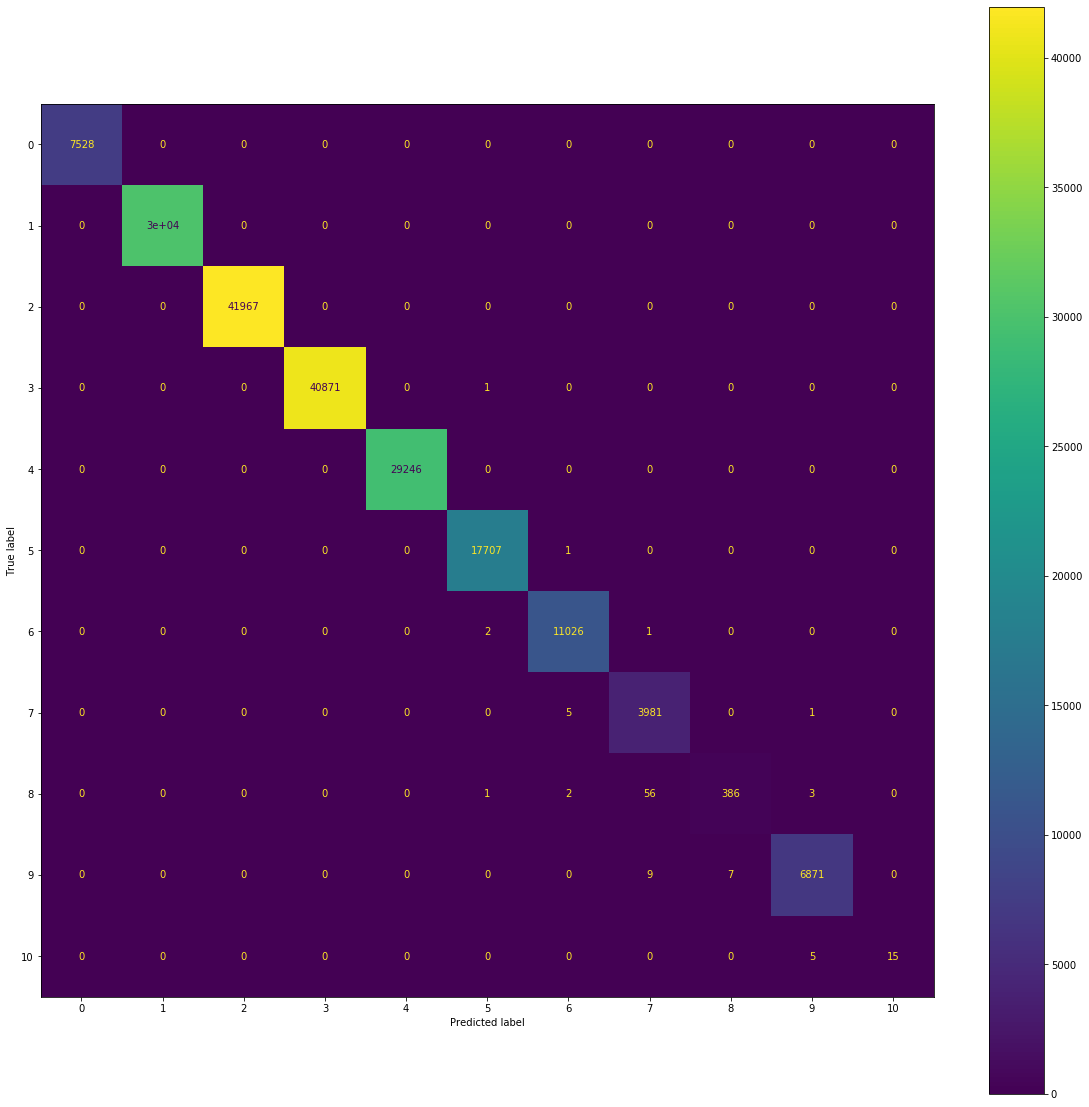

In [17]:
from sklearn.metrics import plot_confusion_matrix

start = time.time()

fig, ax = plt.subplots(figsize=(20,20))
plot_confusion_matrix(rf, X_test, y_test, ax=ax)

end= time.time()
total = end - start
print("Time:", total/60, "minutes")

In [18]:
pd.DataFrame((ypred/10 * X_test['total_submitted_charges'])).describe()

total_submitted_charges
count             1.899910e+05
mean              7.847873e+04
std               6.021294e+05
min               0.000000e+00
25%               7.188375e+03
50%               2.499126e+04
75%               7.300873e+04
max               2.005640e+08

In [19]:
pd.DataFrame((y_test * X_test['total_submitted_charges'])).describe()

0
count  1.899910e+05
mean   7.835882e+05
std    5.822459e+06
min    0.000000e+00
25%    7.189490e+04
50%    2.499180e+05
75%    7.301069e+05
max    2.005640e+09

In [20]:
ypred

array([4, 2, 6, ..., 4, 4, 3])

In [21]:
X_test['ratepred'] = ypred / 10
X_test['classpred'] = ypred

/Users/Livi/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Livi/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
X_test.columns

Index(['number_of_hcpcs', 'number_of_services', 'total_beneficiaries',
       'total_submitted_charges', 'total_allowed_payment',
       'total_medicare_payment', 'avg_beneficiary_age', 'avg_hcc_risk_score',
       'services_per_capita', 'allowed_payment_per_capita',
       ...
       'subregion_Middle Atlantic', 'subregion_Mountain',
       'subregion_New England', 'subregion_Pacific',
       'subregion_South Atlantic', 'subregion_West North Central',
       'subregion_West South Central', 'class', 'ratepred', 'classpred'],
      dtype='object', length=175)

In [23]:
X_test['new_payment_per_service'] = X_test.total_submitted_charges * X_test.ratepred / X_test.number_of_services

/Users/Livi/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
idx = X_test.index
providers = med.loc[idx,'provider_type']
X_test['provider_type'] = providers

/Users/Livi/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# I looked at this DF by ordering by Risk Score, by Comparing Actual Payment to Predicted Pay, and finally, by Ordering by Diff Rate - PredictedRate.
# Seems highest diffs for for Other Health Services: Mass Immunization and Public Health Welfare Agency.
# I wonder how the model will do if I take out Other Health Services.

In [25]:
pd.options.display.max_rows = 100
X_test['diff'] = X_test.percentage_rate - X_test.ratepred
X_test['classdiff']= X_test['class'] - X_test.classpred
X_test['paydiff'] =X_test.payment_per_service -X_test.new_payment_per_service
X_test.total_
temp = X_test[['provider_type','total_medicare_payment','number_of_services','payment_per_service','new_payment_per_service', 'percentage_rate','ratepred','classpred', 'diff','classdiff','paydiff','avg_hcc_risk_score']]
temp.sort_values(['diff'], ascending=False).head(100)

/Users/Livi/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Livi/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Livi/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

provider_type  total_medicare_payment  \
801934                              Family Practice                  982.72   
731206  Registered Dietician/Nutrition Professional                  592.95   
42989                           Clinical Laboratory                44877.70   
200942                 Public Health Welfare Agency              1183672.86   
397663                          Clinical Laboratory                93964.81   
822288  Registered Dietician/Nutrition Professional                 1029.00   
427836                      Certified Nurse Midwife                 1078.14   
151869      Independent Diagnostic Testing Facility                17265.91   
415875                         Diagnostic Radiology               548833.77   
283406                              Family Practice                  268.38   
183861  Registered Dietician/Nutrition Professional                 5706.46   
569236                              Family Practice                 7631.18   
564378                         Diagnostic Radiology               183582.96   
505836                           Nurse Practitioner                25479.45   
836554  Registered Dietician/Nutrition Professional                47093.48   
748947  Registered Dietician/Nutrition Professional                 1906.35   
552063                          Clinical Laboratory               360911.93   
299011                           Nurse Practitioner                  857.69   
80400                               Family Practice                39830.86   
560750                            Internal Medicine                15765.10   
685684                            Internal Medicine                 3504.73   
861068                         Diagnostic Radiology                86174.59   
137204                          Clinical Laboratory              1731669.71   
95183                         Obstetrics/Gynecology                13617.59   
728738                         Diagnostic Radiology                44340.37   
938199                          Clinical Laboratory                58825.91   
918495  Registered Dietician/Nutrition Professional                 9430.63   
476171                           Pediatric Medicine                42170.65   
319102                              Family Practice                19717.16   
126239  Registered Dietician/Nutrition Professional                42324.83   
733180  Registered Dietician/Nutrition Professional                93181.35   
536823                           Nurse Practitioner                 2559.95   
736651                                Endocrinology               339747.02   
396972                        Obstetrics/Gynecology                 3100.55   
762108                         Diagnostic Radiology                13406.77   
362819                           Nurse Practitioner                 1104.46   
567731                        Obstetrics/Gynecology               139399.96   
422178                        Obstetrics/Gynecology                23239.77   
923136                        Obstetrics/Gynecology                16957.40   
230832                            Internal Medicine                 1976.34   
415996                           Nurse Practitioner                 2968.13   
91184   Registered Dietician/Nutrition Professional                14512.98   
63590                               Family Practice                 3352.84   
529187                        Obstetrics/Gynecology                22435.11   
406212                         Diagnostic Radiology                21172.09   
234388                             General Practice                 7743.41   
267687                           Nurse Practitioner                  793.31   
596541                   Ambulatory Surgical Center               980466.62   
82740                             Internal Medicine                53626.16   
103468                            Internal Medicine               205022.36   
110584   

In [26]:
temp[temp.classpred >0].paydiff.sum()

2123189.088128011

In [27]:
temp[(temp.avg_hcc_risk_score < 1) & (temp.paydiff > 100)&(temp.new_payment_per_service>0)].sort_values('paydiff',ascending=False)

provider_type  total_medicare_payment  \
750961          Ambulatory Surgical Center               113043.59   
176288          Ambulatory Surgical Center               848707.96   
180673                 Clinical Laboratory              4460972.58   
814638          Ambulatory Surgical Center               164353.70   
538481          Ambulatory Surgical Center               449324.78   
...                                    ...                     ...   
141148          Ambulatory Surgical Center               801587.72   
838281                                CRNA                31454.18   
788791  Plastic and Reconstructive Surgery                12923.82   
834735                  Radiation Oncology               601323.65   
82771                                 CRNA                 2973.45   

        number_of_services  payment_per_service  new_payment_per_service  \
750961                  67          1687.217761              1135.522388   
176288                 853           994.968300               543.329308   
180673                1327          3361.697498              2940.000000   
814638                 206           797.833495               428.370874   
538481                 542           829.012509               462.096679   
...                    ...                  ...                      ...   
141148                1790           447.814369               345.727067   
838281                 148           212.528243               110.505405   
788791                  61           211.865902               109.971459   
834735                2210           272.092149               170.934067   
82771                   14           212.389286               112.350000   

        percentage_rate  ratepred  classpred      diff  classdiff     paydiff  \
750961         0.148585       0.1          1  0.048585          0  551.695373   
176288         0.183124       0.1          1  0.083124          0  451.638992   
180673         0.800404       0.7          7  0.100404          1  421.697498   
814638         0.186248       0.1          1  0.086248          0  369.462621   
538481         0.179402       0.1          1  0.079402          0  366.915830   
...                 ...       ...        ...       ...        ...         ...   
141148         0.259057       0.2          2  0.059057          0  102.087302   
838281         0.192324       0.1          1  0.092324          0  102.022838   
788791         0.192655       0.1          1  0.092655          0  101.894443   
834735         0.159180       0.1          1  0.059180          0  101.158082   
82771          0.189043       0.1          1  0.089043          0  100.039286   

        avg_hcc_risk_score  
750961              0.9335  
176288              0.8618  
180673              0.8633  
814638              0.9233  
538481              0.9491  
...                    ...  
141148              0.8718  
838281              0.9851  
788791              0.8874  
834735              0.8675  
82771               0.7771  

[167 rows x 12 columns]

In [28]:
temp[(temp.avg_hcc_risk_score < 1) & (temp.paydiff > 100)&(temp.new_payment_per_service>0)].sort_values('paydiff',ascending=False).provider_type.value_counts()

Ambulatory Surgical Center                 119
Independent Diagnostic Testing Facility     10
Plastic and Reconstructive Surgery           8
Orthopedic Surgery                           7
CRNA                                         5
Anesthesiology                               5
Neurosurgery                                 4
Thoracic Surgery                             2
General Surgery                              2
Radiation Oncology                           1
Ophthalmology                                1
Multispecialty Clinic/Group Practice         1
Clinical Laboratory                          1
Obstetrics/Gynecology                        1
Name: provider_type, dtype: int64

In [91]:
zips = med.loc[temp.index].full_zip
#temp.join(zips).set_index(zips).drop(columns = 'full_zip').reset_index()
temp.join(zips).sort_values(['full_zip','provider_type'])[temp.provider_type=='Mass Immunization Roster Biller'][['full_zip','provider_type','payment_per_service']].tail(100)

/Users/Livi/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


full_zip                    provider_type  payment_per_service
286512     98144  Mass Immunization Roster Biller            20.523838
296576     98155  Mass Immunization Roster Biller            20.966275
304966     98177  Mass Immunization Roster Biller            24.625847
305421     98198  Mass Immunization Roster Biller            19.710129
291158     98201  Mass Immunization Roster Biller            18.143514
289132     98203  Mass Immunization Roster Biller            25.806950
294575     98208  Mass Immunization Roster Biller            16.384664
302213     98208  Mass Immunization Roster Biller            17.120973
285795     98221  Mass Immunization Roster Biller            20.318199
302344     98225  Mass Immunization Roster Biller            14.863958
292400     98226  Mass Immunization Roster Biller            14.821111
285590     98230  Mass Immunization Roster Biller            18.868574
301086     98248  Mass Immunization Roster Biller            14.925227
301880     98270  Mass Immunization Roster Biller            27.084050
289948     98271  Mass Immunization Roster Biller            20.607250
305680     98272  Mass Immunization Roster Biller            26.492524
300616     98272  Mass Immunization Roster Biller            18.169901
288634     98272  Mass Immunization Roster Biller            18.999623
301691     98273  Mass Immunization Roster Biller            22.001351
290624     98274  Mass Immunization Roster Biller            15.227228
291151     98277  Mass Immunization Roster Biller            18.564595
302329     98292  Mass Immunization Roster Biller            25.370776
284144     98311  Mass Immunization Roster Biller            15.080193
294874     98329  Mass Immunization Roster Biller            19.614191
299847     98335  Mass Immunization Roster Biller            17.056218
286868     98338  Mass Immunization Roster Biller            25.994293
292917     98362  Mass Immunization Roster Biller            14.679796
303383     98368  Mass Immunization Roster Biller            27.234229
304522     98373  Mass Immunization Roster Biller            19.576695
303377     98375  Mass Immunization Roster Biller            23.412917
285794     98382  Mass Immunization Roster Biller            27.444299
284219     98382  Mass Immunization Roster Biller             8.397711
286151     98382  Mass Immunization Roster Biller            18.609948
286921     98383  Mass Immunization Roster Biller             7.706804
303881     98387  Mass Immunization Roster Biller            21.476574
300378     98390  Mass Immunization Roster Biller            20.166862
304993     98405  Mass Immunization Roster Biller            19.948182
297288     98405  Mass Immunization Roster Biller            19.457714
299042     98406  Mass Immunization Roster Biller            26.389785
300985     98408  Mass Immunization Roster Biller            21.823884
299044     98408  Mass Immunization Roster Biller            22.663100
296931     98409  Mass Immunization Roster Biller             8.213312
297953     98466  Mass Immunization Roster Biller            19.983397
300137     98502  Mass Immunization Roster Biller            16.642123
290646     98502  Mass Immunization Roster Biller            25.400868
286850     98503  Mass Immunization Roster Biller            24.241267
299453     98516  Mass Immunization Roster Biller             8.650318
304068     98516  Mass Immunization Roster Biller            24.936481
288407     98528  Mass Immunization Roster Biller            22.430269
302561     98532  Mass Immunization Roster Biller            18.700520
294876     98577  Mass Immunization Roster Biller            20.036580
283534     98584  Mass Immunization Roster Biller            18.103474
284528     98607  Mass Immunization Roster Biller             8.154808
292571     98626  Mass Immunization Roster Biller            26.611613
298145     98648  Mass Immunization Roster Biller            26.110595
305210     98661  Mass Immunizat

In [29]:
print("Savings minus the 'new payments' erroneously set at $0:", temp[temp.new_payment_per_service>0].paydiff.sum())

Savings minus the 'new payments' erroneously set at $0: 2123189.088128011


In [31]:
X.head()

number_of_hcpcs  number_of_services  total_beneficiaries  \
0               14                  46                   26   
1               18                 135                   41   
2                2                  13                   12   
3                9                  30                   21   
4                7                  36                   26   

   total_submitted_charges  total_allowed_payment  total_medicare_payment  \
0                  4042.00                2320.28                 1721.94   
1                  9399.00                7435.61                 3899.56   
2                  3910.27                 846.68                  667.53   
3                  1609.92                1570.54                 1231.86   
4                  3770.00                1812.43                 1422.64   

   avg_beneficiary_age  avg_hcc_risk_score  services_per_capita  \
0                   60              1.3464                 1.77   
1                   74              1.0309                 3.29   
2                   61              1.5304                 1.08   
3                   70              0.8738                 1.43   
4                   68              1.2295                 1.38   

   allowed_payment_per_capita  ...  region_West  subregion_East North Central  \
0                       89.24  ...            0                             1   
1                      181.36  ...            0                             1   
2                       70.56  ...            0                             1   
3                       74.79  ...            0                             1   
4                       69.71  ...            0                             1   

   subregion_East South Central  subregion_Middle Atlantic  \
0                             0                          0   
1                             0                          0   
2                             0                          0   
3                             0                          0   
4                             0                          0   

   subregion_Mountain  subregion_New England  subregion_Pacific  \
0                   0                      0                  0   
1                   0                      0                  0   
2                   0                      0                  0   
3                   0                      0                  0   
4                   0                      0                  0   

   subregion_South Atlantic  subregion_West North Central  \
0                         0                             0   
1                         0                             0   
2                         0                             0   
3                         0                             0   
4                         0                             0   

   subregion_West South Central  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  

[5 rows x 171 columns]

In [32]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

Does a scaler help reduce the spread of a feature?

In [57]:
z = np.array(X.total_medicare_payment).reshape(-1,1)
scaler.fit(z)
X_scaled = scaler.transform(z)

In [58]:
X_scaled

array([[-0.38450677],
       [-0.35708705],
       [-0.39778348],
       ...,
       [-0.33035634],
       [-0.26247919],
       [ 0.62071975]])

In [52]:
X_scaled[:,5]

array([-0.38450677, -0.35708705, -0.39778348, ..., -0.33035634,
       -0.26247919,  0.62071975])